# **Tugas OpenCV Thresholding**
- Nama: M. Fazri Nizar
- NIM: 09021282328053
- Kelas: Pengolahan Citra L1

**1. Install Libraries yang Dibutuhkan**

In [ ]:
%pip install opencv-python
%pip install requests
%pip install numpy
%pip install matplotlib

**2. Import Libraries yang Dibutuhkan**

In [11]:
from google.colab.patches import cv2_imshow
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

**3. Unduh Gambar dan Simpan**

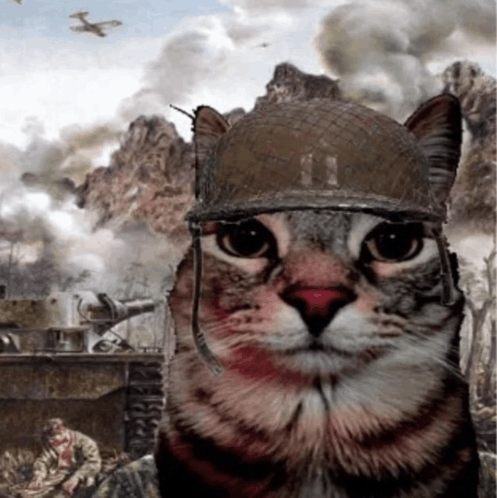

In [12]:
url = 'https://mfazrinizar.com/assets/img/akmal-war.jpg'
response = requests.get(url, stream=True)
response.raise_for_status()

with open('object.jpg', 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

image = cv2.imread("object.jpg")
cv2_imshow(image)

**4. Jalankan Operasi Thresholding**

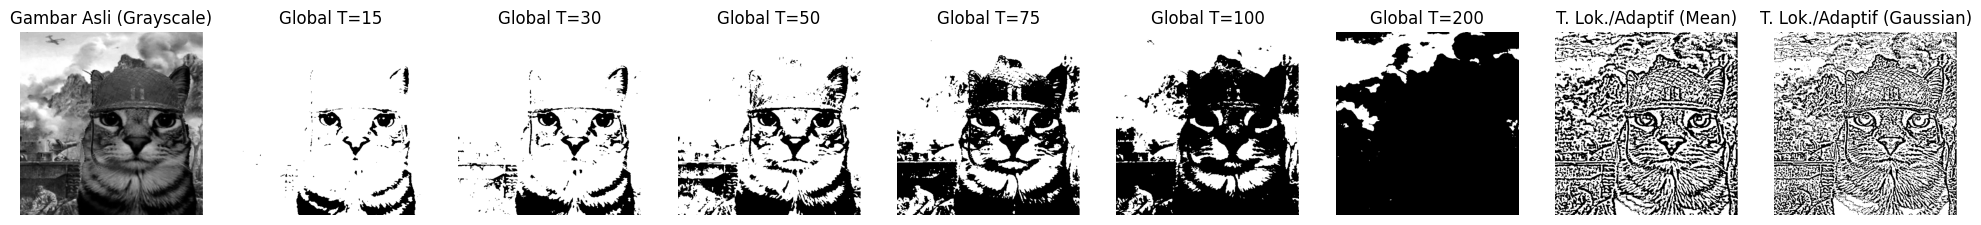

In [13]:
# Read grayscale image
img = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)

# Multiple global threshold values
threshold_values = [15, 30, 50, 75, 100, 200]

# Apply each global threshold
global_thresh_results = []
for val in threshold_values:
    _, th = cv2.threshold(img, val, 255, cv2.THRESH_BINARY)
    global_thresh_results.append((val, th))

# Local/adaptive threshold (mean)
thresh_local = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

# Local/adaptive threshold (Gaussian)
thresh_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Show results: original, multiple globals, mean, gaussian
fig, axs = plt.subplots(1, len(global_thresh_results) + 3, figsize=(25, 5))

# Original
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Gambar Asli (Grayscale)')
axs[0].axis('off')

# Global threshold variations
for i, (val, res) in enumerate(global_thresh_results, start=1):
    axs[i].imshow(res, cmap='gray')
    axs[i].set_title(f'Global T={val}')
    axs[i].axis('off')

# Mean adaptive
axs[-2].imshow(thresh_local, cmap='gray')
axs[-2].set_title('T. Lok./Adaptif (Mean)')
axs[-2].axis('off')

# Gaussian adaptive
axs[-1].imshow(thresh_adaptive, cmap='gray')
axs[-1].set_title('T. Lok./Adaptif (Gaussian)')
axs[-1].axis('off')

plt.show()

**5. Analisis**

Beberapa metode thresholding yang diterapkan dalam notebook ini, yaitu:

### 1. Global Thresholding dengan berbagai nilai threshold (15, 30, 50, 75, 100, 200).
- Metode ini membagi piksel menjadi dua kelompok berdasarkan nilai ambang batas (T = threshold).
- Hasilnya menunjukkan bagaimana perubahan nilai threshold memengaruhi segmentasi objek dalam gambar.  Nilai threshold yang lebih tinggi menghasilkan citra biner yang lebih putih (latar belakang yang lebih dominan), sementara nilai rendah akan membuat foreground lebih menonjol.

### 2. Local/Adaptive Thresholding (Mean):
- Metode ini menghitung threshold secara lokal, yang lebih baik untuk gambar dengan variasi pencahayaan yang tidak merata.  
- Nilai threshold dihitung berdasarkan rata-rata intensitas piksel di sekitar setiap piksel.

### 3. Local/Adaptive Thresholding (Gaussian):
- Mirip dengan adaptive mean, tetapi threshold dihitung dengan menggunakan weighted average (gaussian) dari intensitas piksel di sekitar setiap piksel.
- Cara ini umumnya lebih robust terhadap noise.
- Apabila dibandingkan, adaptive gaussian dengan adaptive mean dan global threshold, terdapat perbedaan segmentasi, terutama pada area dengan variasi pencahayaan.

## Kesimpulan:
- Pemilihan metode thresholding bergantung pada karakteristik gambar dan tujuan segmentasi.
- Jika pencahayaan merata, global threshold mungkin cukup.  
- Untuk gambar dengan variasi pencahayaan, adaptive thresholding biasanya lebih baik, dan Gaussian cenderung lebih robust terhadap noise. Terlihat pada gambar perbandingan.